In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hankel

# We need the spline interpolation to obtain a smooth function that can be transformed back to the original function
from scipy.interpolate import InterpolatedUnivariateSpline as spline

Let's define some functions of r

$$a = \frac{1}{r^2 + 1}$$

$$b = r^2$$

$$c = sin(r) cos(r)$$


In [2]:
a = lambda r: 1 / (np.power(r,2) + 1)
b = lambda r: np.power(r, 2)
c = lambda r: np.sin(r) * np.cos(r)

Define a "analytical" non-filtered approach hankel transform from <i>hankel</i>

In [3]:
ht = hankel.HankelTransform(nu=1, N=500, h=0.0005)

In [4]:
realspace = np.linspace(-10, 10, 150)  #  Realspace domain
hankelspace = np.logspace(-3, 4, 300) #  Hankel space domain

In [5]:
h_a = ht.transform(a, hankelspace, ret_err=False)
h_b = ht.transform(b, hankelspace, ret_err=False)
h_c = ht.transform(c, hankelspace, ret_err=False)

(0.0, 4.0)

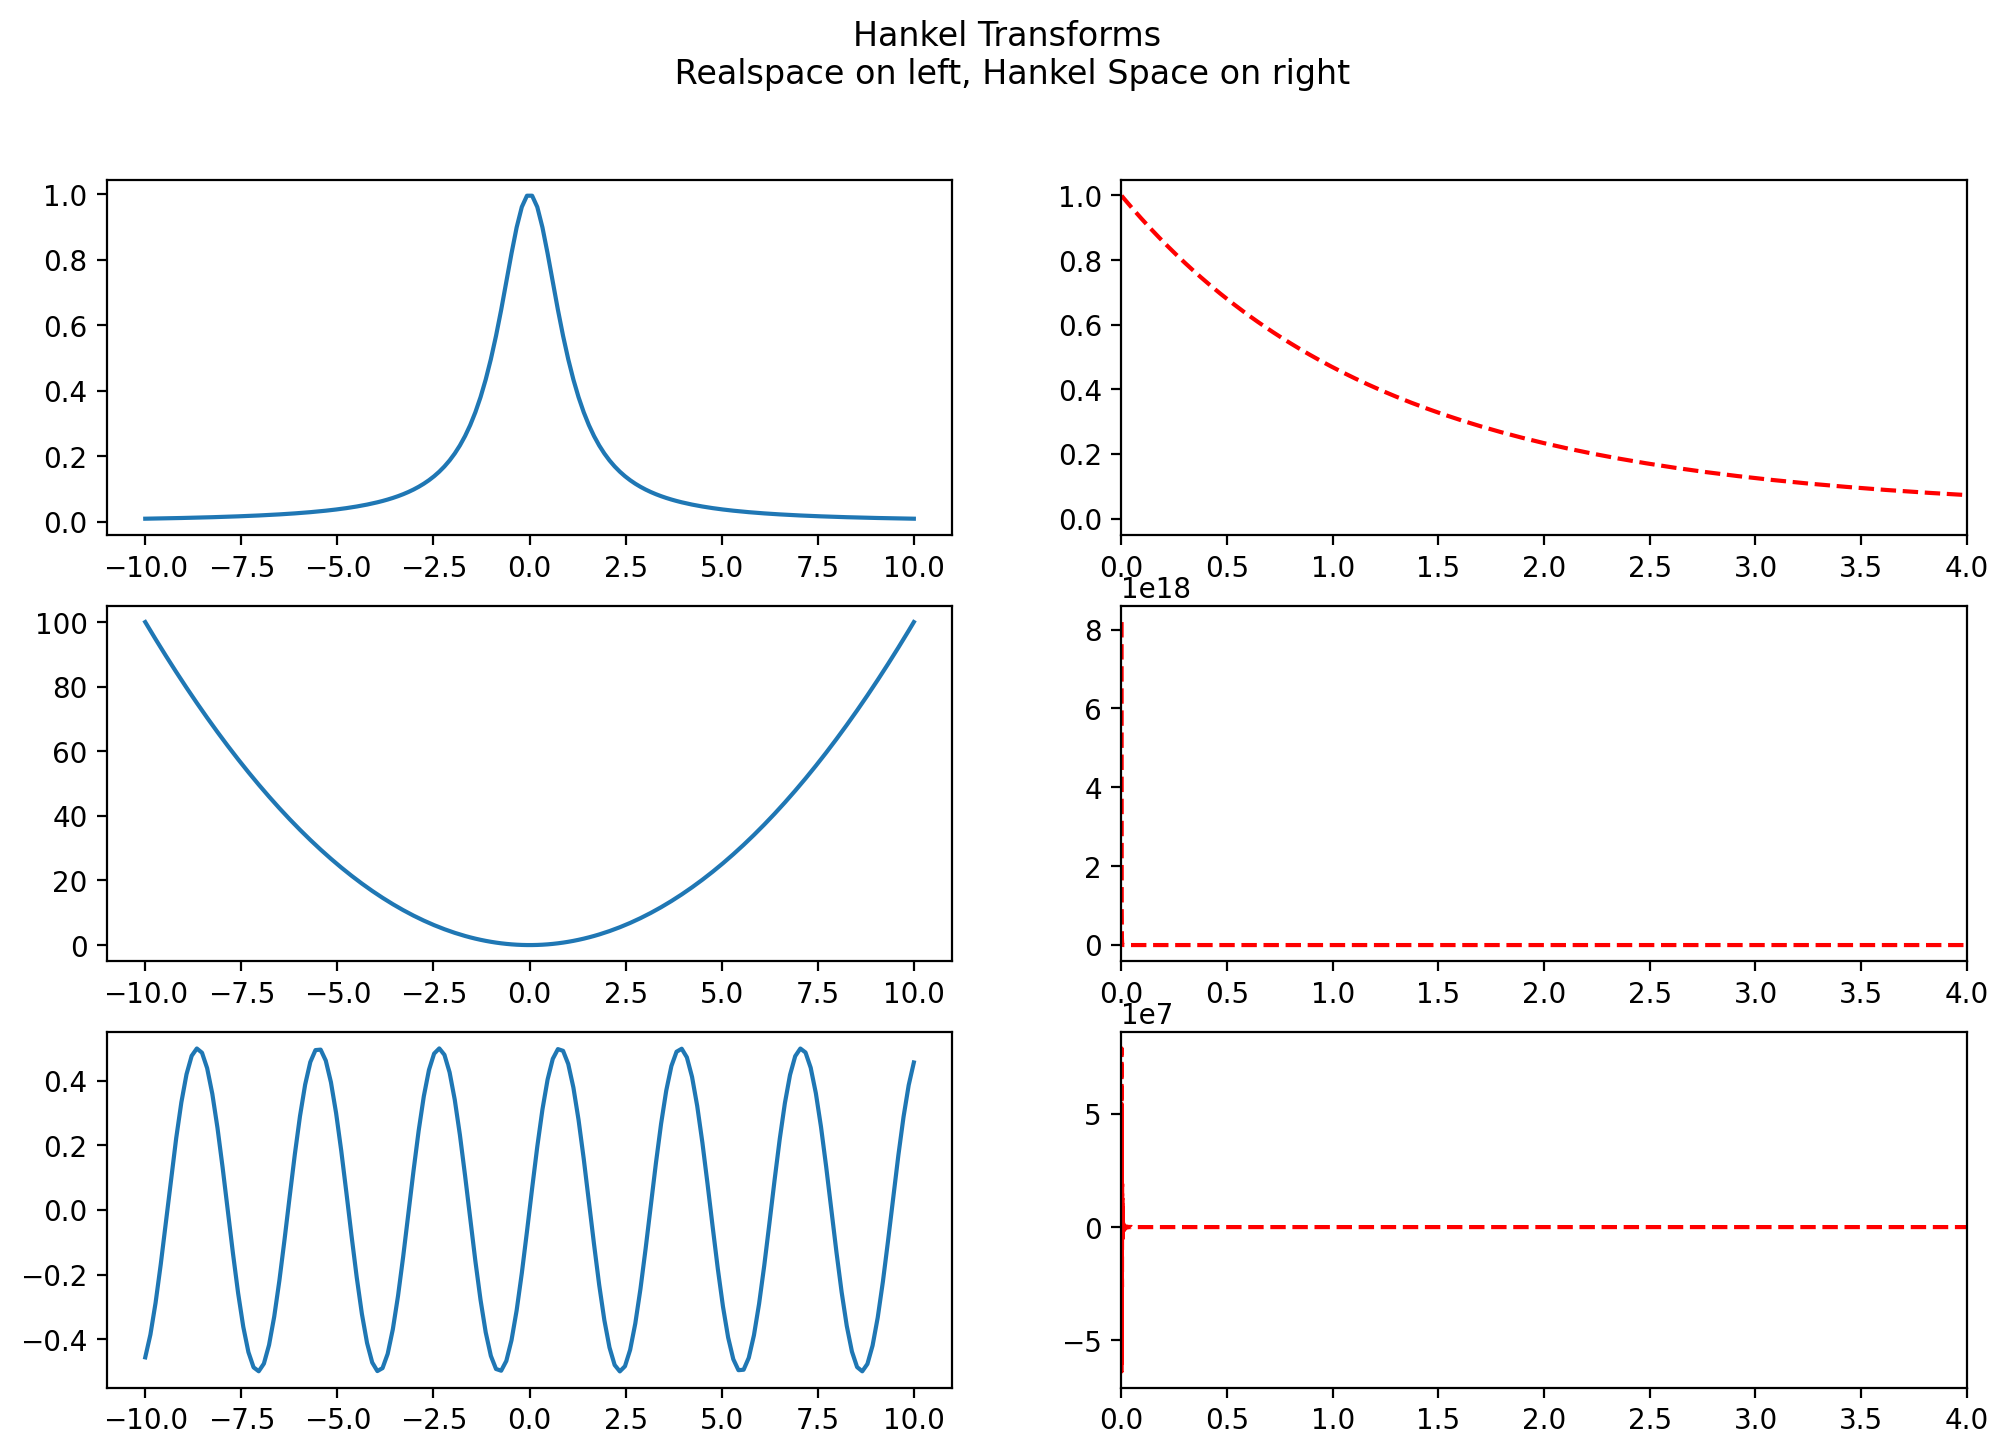

In [6]:
# Plot A
plt.figure(figsize=(12,8), dpi=200, facecolor='w', edgecolor='k')
plt.subplot(321)
plt.plot(realspace, a(realspace))
plt.suptitle("Hankel Transforms\n Realspace on left, Hankel Space on right")
plt.subplot(322)
plt.xlim([0, 4])
plt.plot(hankelspace, h_a, "r--")
# Plot B
plt.subplot(323)
plt.plot(realspace, b(realspace))
plt.subplot(324)
plt.plot(hankelspace, h_b, "r--")
plt.xlim([0, 4])
# Plot C
plt.subplot(325)
plt.plot(realspace, c(realspace))
plt.subplot(326)
plt.plot(hankelspace, h_c, "r--")
plt.xlim([0, 4])

Inverting the Hankel transformations to recover $f(x)$

In [7]:
# Compute inverse hankel transformations by splining the discrete hankel transformation and running the inverse 
spline_a = spline(hankelspace, h_a)
spline_b = spline(hankelspace, h_b)
spline_c = spline(hankelspace, h_c)

recover_a = ht.transform(spline_a, realspace, inverse=True, ret_err=False)
recover_b = ht.transform(spline_b, realspace, inverse=True, ret_err=False)
recover_c = ht.transform(spline_c, realspace, inverse=True, ret_err=False)

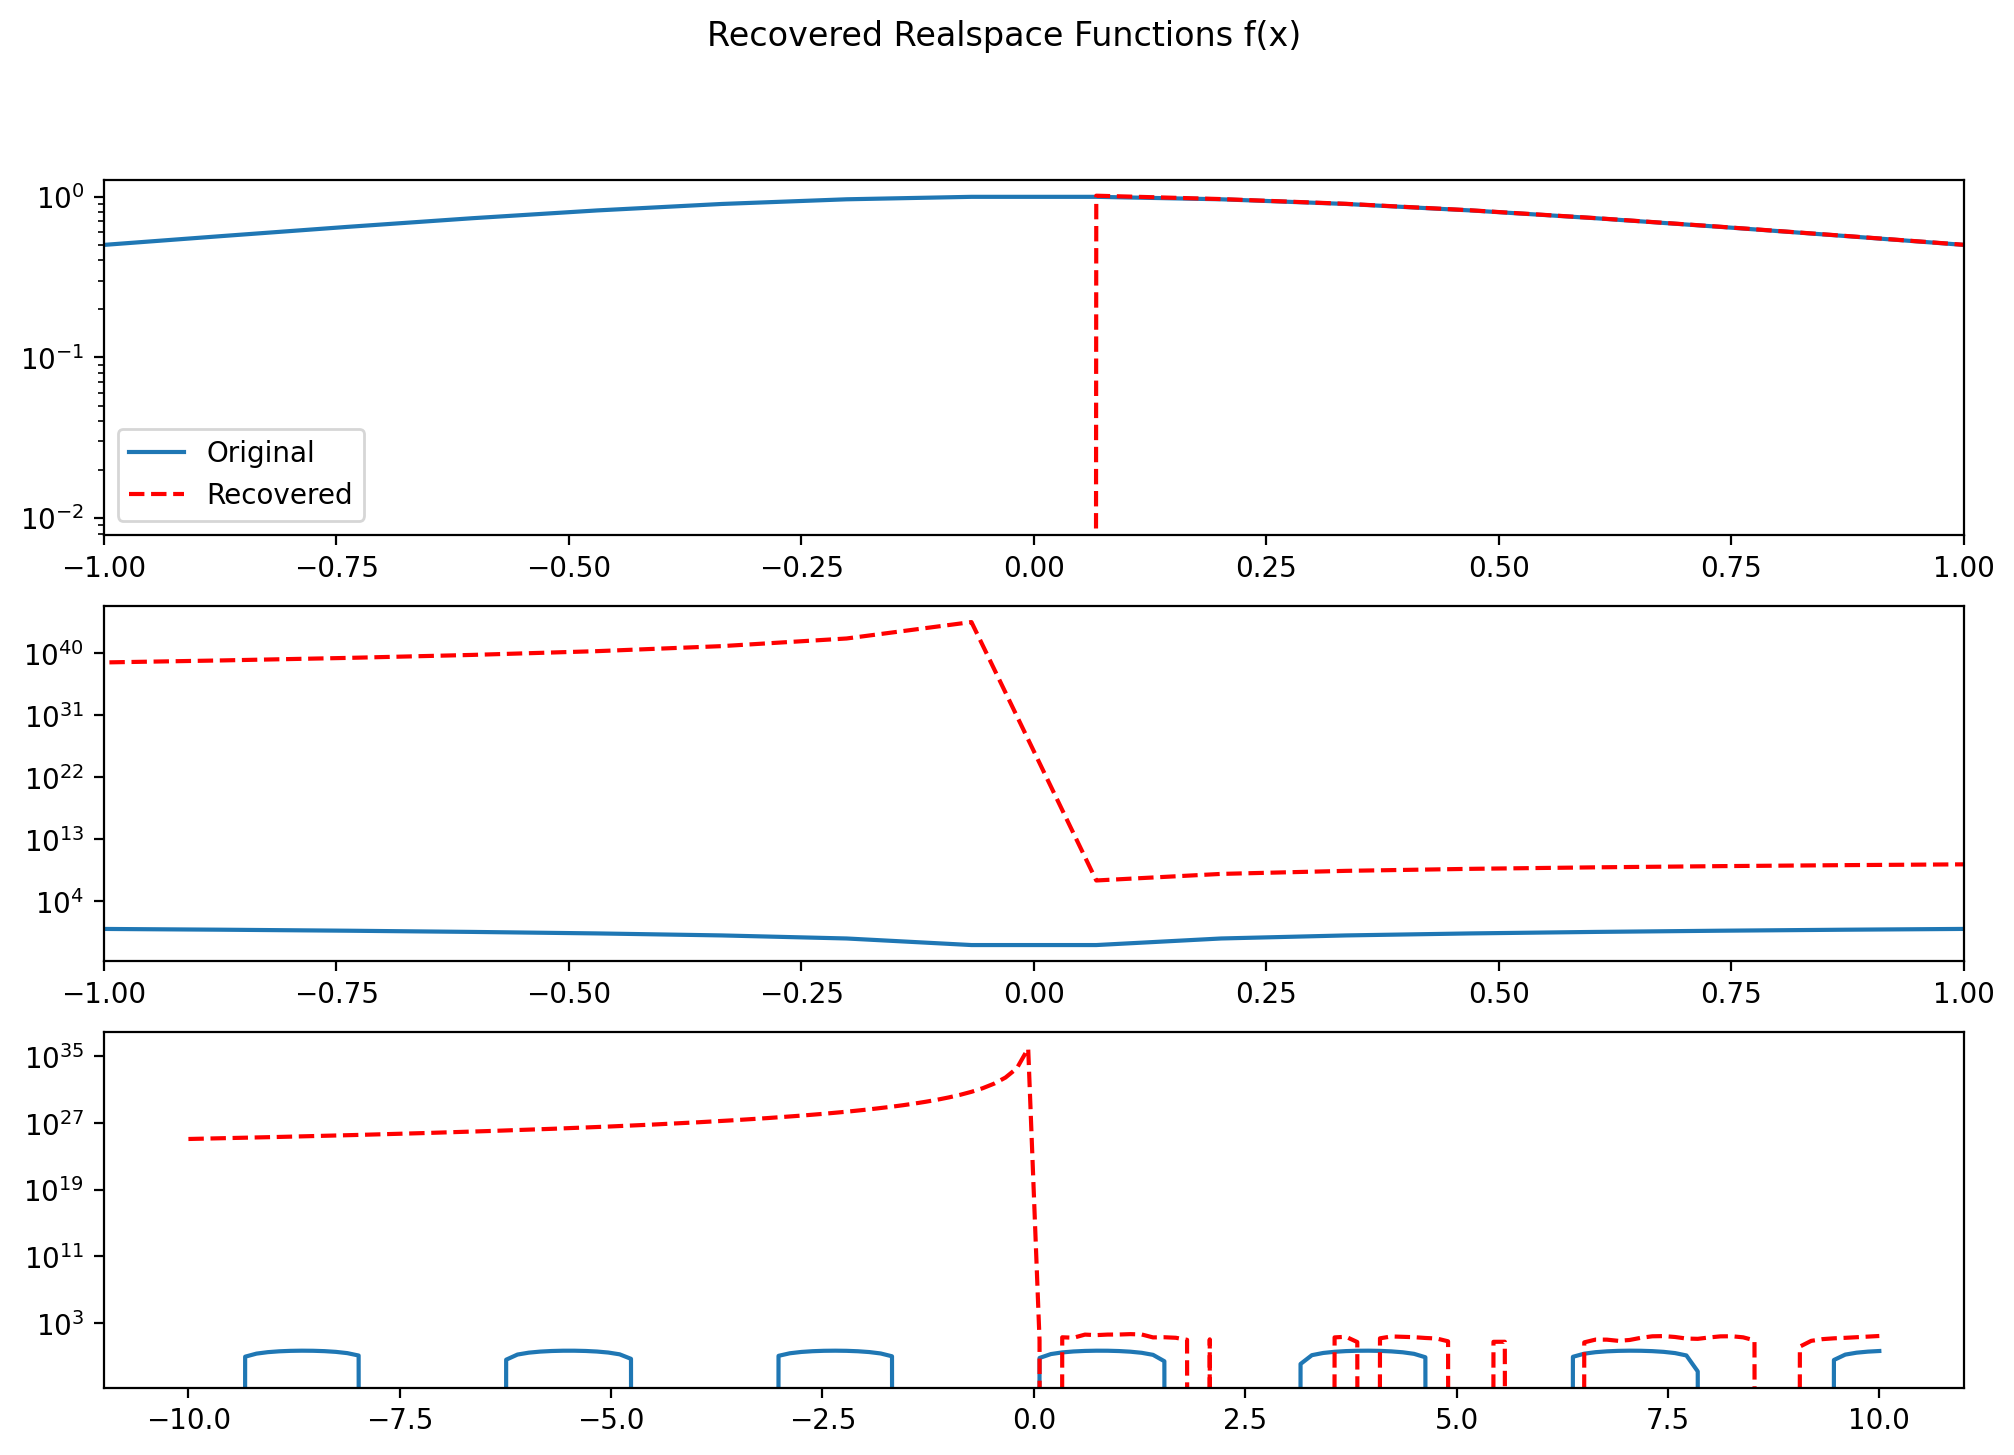

In [8]:
# Recovered A
plt.figure(figsize=(12,8), dpi=200, facecolor='w', edgecolor='k')
plt.suptitle("Recovered Realspace Functions f(x)")
plt.subplot(311)
plt.plot(realspace, a(realspace), label='Original')
plt.plot(realspace, recover_a, "r--", label='Recovered')
plt.xlim([-1,1])
plt.yscale('log')
plt.legend()
# Recovered B
plt.subplot(312)
plt.plot(realspace, b(realspace))
plt.plot(realspace, recover_b, "r--")
plt.xlim([-1,1])
plt.yscale('log')
# Recovered C
plt.subplot(313)
plt.plot(realspace, c(realspace))
plt.plot(realspace, recover_c, "r--")
plt.yscale('log')

For the purposes of troubleshooting and visualization, we will use equation a:
    $$a = \frac{1}{r^2 + 1}$$

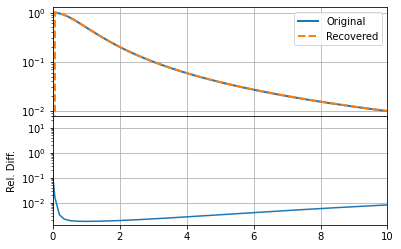

In [10]:
# Recovered, example taken from hankel user guide

fig,ax = plt.subplots(2,1,sharex=True,gridspec_kw={"hspace":0})

ax[0].semilogy(realspace,a(realspace), linewidth=2,label='Original')
ax[0].semilogy(realspace,recover_a,ls='--',linewidth=2,label='Recovered')
ax[0].grid(True)
ax[0].legend(loc='best')
ax[0].set_xlim(0,10)

ax[1].plot(realspace, np.abs(a(realspace)/recover_a-1))
ax[1].set_yscale('log')
ax[1].set_ylim(None,30)
ax[1].grid(True)
ax[1].set_ylabel("Rel. Diff.")
plt.show()


# Digital Filters to obtain the Hankel Transform
### From Guptasarma and Singh, 1997

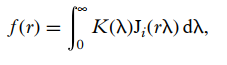

In [19]:
# Load the 47 point J1 filter from Guptasarma 1997
# n = 47

a = np.fromfile('gup1997J147pt.csv', float, sep=',')

47

In [ ]:
# Abscissae:
def abscissae(r):
    # Returns the lambdas used in the method of Guptasarma and Singh 1997
    # a = -3.05078187595e0
    # s = 1.10599010095e-1